<a href="https://colab.research.google.com/github/pankaj18/time_series_forecasting/blob/master/Time_series_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
  plt.plot(time[start:end],series[start:end],format,label=label)
  plt.xlabel("time")
  plt.ylabel("value")
  if label:
    plt.legend(fontsize=14)
  plt.grid=True


In [0]:
plt.style.use("dark_background")

# Trend and Seasonality

## time series with trend

In [0]:
def trend(time,slope=0):
  return slope*time

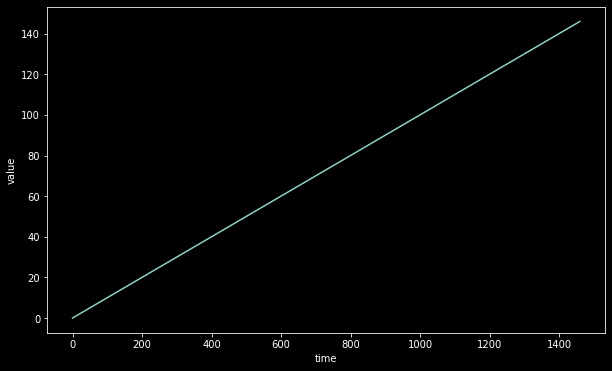

In [7]:
time=np.arange(4*365+1)
baseline=10
series=trend(time,slope=0.1)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [0]:
## time series with seasonality

In [0]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.4,np.cos(2*np.pi*season_time),1/np.exp(3*season_time))
def seasonality(time,period,amplitude=1,phase=0):
  season_time=((time+phase)%period)/period
  return amplitude*seasonal_pattern(season_time)


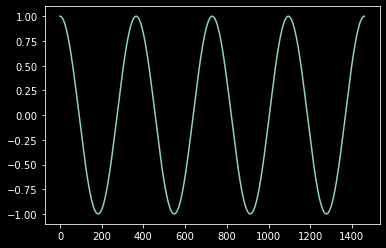

In [18]:
plt.plot(np.cos(2*np.pi*season_time))

In [17]:
season_time=((np.arange(4*365+1)+0)%365)/365
season_time

array([0.        , 0.00273973, 0.00547945, ..., 0.99452055, 0.99726027,
       0.        ])

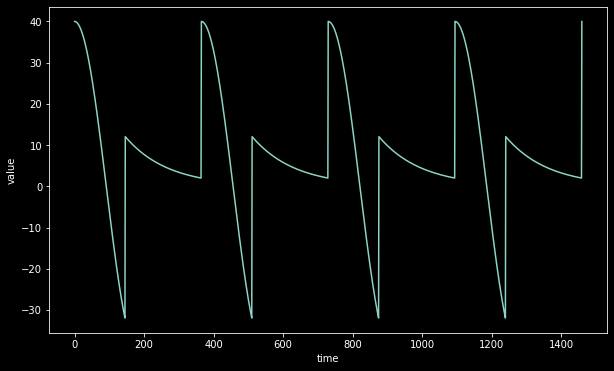

In [10]:
baseline=10
amplitude=40
series=seasonality(time,period=365,amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

time series with both trend and seasonality

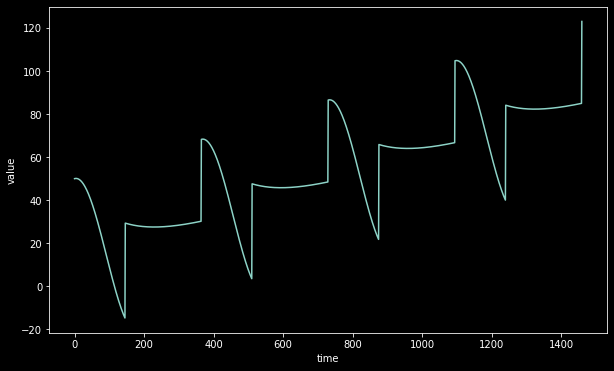

In [21]:
slope=0.05
series=baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

# Noise

In [0]:
def white_noise(time,noise_level=1,seed=None):
  rnd=np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level
  

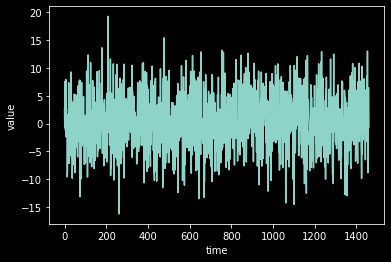

In [23]:
noise_level=5
noise=white_noise(time,noise_level,seed=42)
plot_series(time,noise)
plt.show()


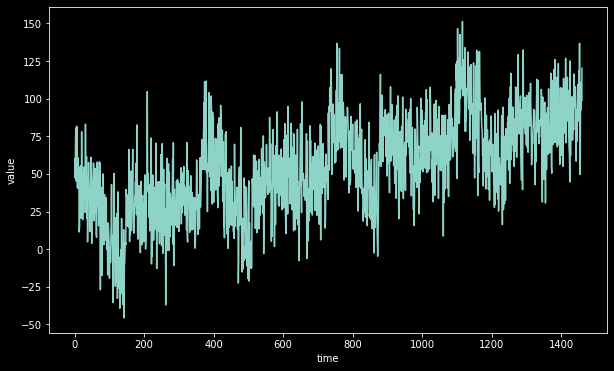

In [28]:
series=series+noise
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

# forecast

In [0]:
split_time=1000
time_train=time[:1000]
time_val=series[1000:]
x_train=series[:1000]
x_val=series[1000:]
